In [6]:
import numpy as np
import matplotlib.pyplot as plt

import gym
from gym import wrappers

%matplotlib inline

In [68]:
import time

# APIが変わっているので以下確認
# https://www.gymlibrary.dev/
NUM_DIZITIZE = 6
frames = []
env = gym.make('CartPole-v1', render_mode="rgb_array")
observation = env.reset()  # 最初に環境のresetが必要

def bins(clip_min, clip_max, num):
    return np.linspace(clip_min, clip_max, num + 1)[1:-1]

def digitize_state(observation):
    cart_pos, cart_v, pole_angle, pole_v = observation
    digitized = [
        np.digitize(cart_pos, bins=bins(-2.4, 2.4, NUM_DIZITIZED)),
        np.digitize(cart_v, bins=bins(-3.0, 3.0, NUM_DIZITIZED)),
        np.digitize(pole_angle, bins=bins(-0.5, 0.5, NUM_DIZITIZED)),
        np.digitize(pole_v, bins=bins(-2.0, 2.0, NUM_DIZITIZED))]
    return sum([x * (NUM_DIZITIZED**i) for i, x in enumerate(digitized)])

for step in range(0, 100):
    frames.append(env.render())  # framesに各時刻の画像を追加していく
    action = np.random.choice(2)  # 0(カートを左に押す), 1(カートを右に押す)をランダムに返す
    env.step(action)
    observation, reward, terminated, truncated, info = env.step(action)  # actionを実行する

env.close()

ValueError: not enough values to unpack (expected 4, got 2)

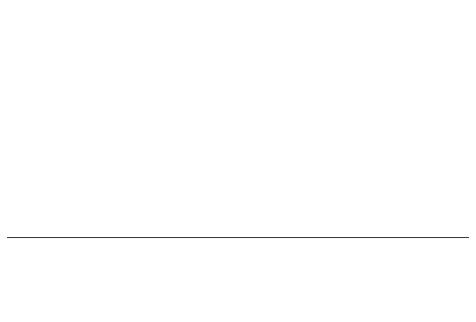

In [63]:
# framesを保存する
# ただし現状再生と保存が同時にできない
from matplotlib import animation

fig = plt.figure(figsize=(frames[0].shape[1]/72.0, frames[0].shape[0]/72.0), dpi=72)
ax = fig.add_subplot()
ax.axis('off')
output_frames = [[plt.imshow(f)] for f in frames]
anim = animation.ArtistAnimation(fig, output_frames, interval=50, repeat=False)
anim.save("animation.gif", writer="pillow")